<a href="https://colab.research.google.com/github/karnavenkatraj/Case-Study/blob/main/Modeling%20Case%20Study_v01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# INN Hotels Project

## Context

A significant number of hotel bookings are called-off due to cancellations or no-shows. The typical reasons for cancellations include change of plans, scheduling conflicts, etc. This is often made easier by the option to do so free of charge or preferably at a low cost which is beneficial to hotel guests but it is a less desirable and possibly revenue-diminishing factor for hotels to deal with. Such losses are particularly high on last-minute cancellations.

The new technologies involving online booking channels have dramatically changed customers’ booking possibilities and behavior. This adds a further dimension to the challenge of how hotels handle cancellations, which are no longer limited to traditional booking and guest characteristics.

The cancellation of bookings impact a hotel on various fronts:
* Loss of resources (revenue) when the hotel cannot resell the room.
* Additional costs of distribution channels by increasing commissions or paying for publicity to help sell these rooms.
* Lowering prices last minute, so the hotel can resell a room, resulting in reducing the profit margin.
* Human resources to make arrangements for the guests.

## Objective
The increasing number of cancellations calls for a Machine Learning based solution that can help in predicting which booking is likely to be canceled. INN Hotels Group has a chain of hotels in Portugal, they are facing problems with the high number of booking cancellations and have reached out to your firm for data-driven solutions. You as a data scientist have to analyze the data provided to find which factors have a high influence on booking cancellations, build a predictive model that can predict which booking is going to be canceled in advance, and help in formulating profitable policies for cancellations and refunds.

## Data Description
The data contains the different attributes of customers' booking details. The detailed data dictionary is given below.


**Data Dictionary**

* Booking_ID: unique identifier of each booking
* no_of_adults: Number of adults
* no_of_children: Number of Children
* no_of_weekend_nights: Number of weekend nights (Saturday or Sunday) the guest stayed or booked to stay at the hotel
* no_of_week_nights: Number of week nights (Monday to Friday) the guest stayed or booked to stay at the hotel
* type_of_meal_plan: Type of meal plan booked by the customer:
    * Not Selected – No meal plan selected
    * Meal Plan 1 – Breakfast
    * Meal Plan 2 – Half board (breakfast and one other meal)
    * Meal Plan 3 – Full board (breakfast, lunch, and dinner)
* required_car_parking_space: Does the customer require a car parking space? (0 - No, 1- Yes)
* room_type_reserved: Type of room reserved by the customer. The values are ciphered (encoded) by INN Hotels.
* lead_time: Number of days between the date of booking and the arrival date
* arrival_year: Year of arrival date
* arrival_month: Month of arrival date
* arrival_date: Date of the month
* market_segment_type: Market segment designation.
* repeated_guest: Is the customer a repeated guest? (0 - No, 1- Yes)
* no_of_previous_cancellations: Number of previous bookings that were canceled by the customer prior to the current booking
* no_of_previous_bookings_not_canceled: Number of previous bookings not canceled by the customer prior to the current booking
* avg_price_per_room: Average price per day of the reservation; prices of the rooms are dynamic. (in euros)
* no_of_special_requests: Total number of special requests made by the customer (e.g. high floor, view from the room, etc)
* booking_status: Flag indicating if the booking was canceled or not.

## Importing necessary libraries and data

In [ ]:

import warnings

warnings.filterwarnings("ignore")
from statsmodels.tools.sm_exceptions import ConvergenceWarning

warnings.simplefilter("ignore", ConvergenceWarning)

# Libraries to help with reading and manipulating data
import pandas as pd
import numpy as np

# libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 200)
# setting the precision of floating numbers to 5 decimal points
pd.set_option("display.float_format", lambda x: "%.5f" % x)

# Library to split data
from sklearn.model_selection import train_test_split

# To build model for prediction
import statsmodels.stats.api as sms
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
from statsmodels.tools.tools import add_constant
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

# To tune different models
from sklearn.model_selection import GridSearchCV


# To get diferent metric scores
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    roc_auc_score,
    plot_confusion_matrix,
    precision_recall_curve,
    roc_curve,
    make_scorer,
)

In [ ]:
# read csv from google drive
from google.colab import drive
drive.mount('/content/drive')
# importing the data set from google drive
df = pd.read_csv('/content/drive/MyDrive/Python Projects/INNHotelsGroup.csv')

Mounted at /content/drive


## Data Overview

- Observations
- Sanity checks

In [ ]:
# copying data to another variable to avoid any changes to original data
df_hotels = df.copy()

In [ ]:
# view the first 5 rows of dataset
df_hotels.head()

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled


In [ ]:
# understand the shape of dataset
df_hotels.shape

(36275, 19)

In [ ]:
df_hotels.describe()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,required_car_parking_space,lead_time,arrival_year,arrival_month,arrival_date,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests
count,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000
mean,1.844962,0.105279,0.810724,2.204300,0.030986,85.232557,2017.820427,7.423653,15.596995,0.025637,0.023349,0.153411,103.423539,0.619655
std,0.518715,0.402648,0.870644,1.410905,0.173281,85.930817,0.383836,3.069894,8.740447,0.158053,0.368331,1.754171,35.089424,0.786236
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2017.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,0.000000,1.000000,0.000000,17.000000,2018.000000,5.000000,8.000000,0.000000,0.000000,0.000000,80.300000,0.000000
50%,2.000000,0.000000,1.000000,2.000000,0.000000,57.000000,2018.000000,8.000000,16.000000,0.000000,0.000000,0.000000,99.450000,0.000000
75%,2.000000,0.000000,2.000000,3.000000,0.000000,126.000000,2018.000000,10.000000,23.000000,0.000000,0.000000,0.000000,120.000000,1.000000
max,4.000000,10.000000,7.000000,17.000000,1.000000,443.000000,2018.000000,12.000000,31.000000,1.000000,13.000000,58.000000,540.000000,5.000000


In [ ]:
df_hotels.describe(include = ['object'])

,type_of_meal_plan,room_type_reserved,market_segment_type,booking_status
count,36275,36275,36275,36275
unique,4,7,5,2
top,Meal Plan 1,Room_Type 1,Online,Not_Canceled
freq,27835,28130,23214,24390


In [ ]:
# Random sample of the data
np.random.seed(1)
df_hotels.sample(n=10)

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
30392,INN30393,1,0,1,0,Not Selected,0,Room_Type 1,53,2018,9,11,Online,0,0,0,94.32,0,Not_Canceled
6685,INN06686,2,0,1,2,Meal Plan 1,0,Room_Type 1,63,2018,4,22,Online,0,0,0,105.30,1,Canceled
8369,INN08370,2,0,2,3,Meal Plan 1,0,Room_Type 4,55,2018,9,11,Online,0,0,0,106.24,0,Not_Canceled
2055,INN02056,2,0,0,2,Not Selected,0,Room_Type 1,53,2017,12,29,Online,0,0,0,81.00,1,Not_Canceled
10969,INN10970,1,0,2,4,Meal Plan 1,0,Room_Type 1,245,2018,7,6,Offline,0,0,0,110.00,0,Canceled
24881,INN24882,2,0,3,7,Meal Plan 1,0,Room_Type 2,231,2018,8,1,Online,0,0,0,81.82,2,Canceled
28658,INN28659,2,0,0,3,Meal Plan 2,0,Room_Type 1,71,2018,5,10,Offline,0,0,0,126.00,1,Not_Canceled
20853,INN20854,2,0,1,2,Meal Plan 1,0,Room_Type 1,66,2017,10,9,Offline,0,0,0,75.00,0,Canceled
8501,INN08502,2,0,0,3,Meal Plan 1,0,Room_Type 2,40,2018,1,14,Online,0,0,0,77.55,1,Not_Canceled
1942,INN01943,2,0,0,2,Meal Plan 1,0,Room_Type 1,63,2018,8,9,Online,0,0,0,144.90,2,Not_Canceled


In [ ]:
df_hotels.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Booking_ID                            36275 non-null  object 
 1   no_of_adults                          36275 non-null  int64  
 2   no_of_children                        36275 non-null  int64  
 3   no_of_weekend_nights                  36275 non-null  int64  
 4   no_of_week_nights                     36275 non-null  int64  
 5   type_of_meal_plan                     36275 non-null  object 
 6   required_car_parking_space            36275 non-null  int64  
 7   room_type_reserved                    36275 non-null  object 
 8   lead_time                             36275 non-null  int64  
 9   arrival_year                          36275 non-null  int64  
 10  arrival_month                         36275 non-null  int64  
 11  arrival_date   

Observations: Most of the variables are integers/floats, catergorical variables include booking_status, market_segment_type and booking status.

In [ ]:
# drop the 'Booking ID' columns from the data set.
df_hotels = df_hotels.drop('Booking_ID', axis=1)

In [ ]:
#checking for null values
df_hotels.isnull().sum()

no_of_adults                            0
no_of_children                          0
no_of_weekend_nights                    0
no_of_week_nights                       0
type_of_meal_plan                       0
required_car_parking_space              0
room_type_reserved                      0
lead_time                               0
arrival_year                            0
arrival_month                           0
arrival_date                            0
market_segment_type                     0
repeated_guest                          0
no_of_previous_cancellations            0
no_of_previous_bookings_not_canceled    0
avg_price_per_room                      0
no_of_special_requests                  0
booking_status                          0
dtype: int64

**Observations:** There are no null values.

In [ ]:
# check for duplicate values
df_hotels[df_hotels.duplicated()].count()

no_of_adults                            10275
no_of_children                          10275
no_of_weekend_nights                    10275
no_of_week_nights                       10275
type_of_meal_plan                       10275
required_car_parking_space              10275
room_type_reserved                      10275
lead_time                               10275
arrival_year                            10275
arrival_month                           10275
arrival_date                            10275
market_segment_type                     10275
repeated_guest                          10275
no_of_previous_cancellations            10275
no_of_previous_bookings_not_canceled    10275
avg_price_per_room                      10275
no_of_special_requests                  10275
booking_status                          10275
dtype: int64

**Observations:** There are no duplicate values in the data

## Exploratory Data Analysis (EDA)

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

**Leading Questions**:
1. What are the busiest months in the hotel?
2. Which market segment do most of the guests come from?
3. Hotel rates are dynamic and change according to demand and customer demographics. What are the differences in room prices in different market segments?
4. What percentage of bookings are canceled?
5. Repeating guests are the guests who stay in the hotel often and are important to brand equity. What percentage of repeating guests cancel?
6. Many guests have special requirements when booking a hotel room. Do these requirements affect booking cancellation?

We are going to start by applying the necessary visualization functions.

In [ ]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 2, 6))
    else:
        plt.figure(figsize=(n + 2, 6))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

In [ ]:
# function to plot a boxplot and a histogram along the same scale.


def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to the show density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

In [ ]:
def stacked_barplot(data, predictor, target, perc=False):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )

    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 5, 5,))
    plt.legend(
        loc="lower left", frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

**Q1: What are the busiest months in the hotel?**

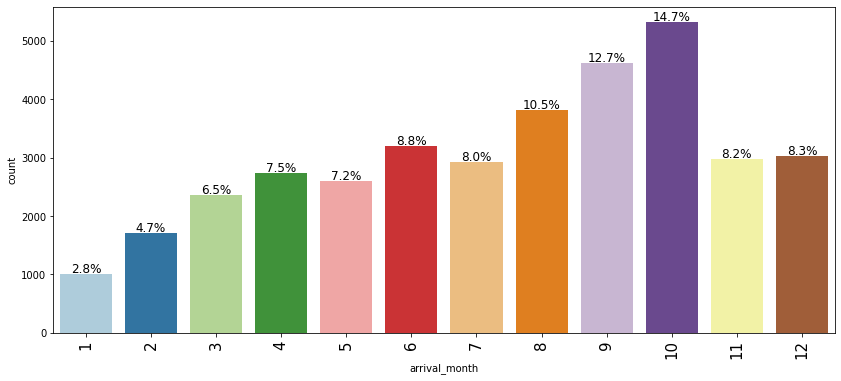

In [ ]:
labeled_barplot(df_hotels, 'arrival_month', perc=True, n=None)

Observations: Month 10 (October) is the busiest month for the hotel group at 14.7%

**Q2: Which market segment do most of the guests come from?**

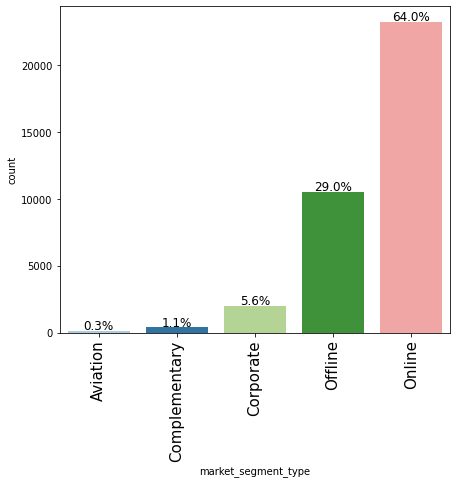

In [ ]:
labeled_barplot(df_hotels, 'market_segment_type', perc=True, n=None)

**Observations:** The Online market is the most popular market segment type (64.0%)

**Q3: Hotel rates are dynamic and change according to demand and customer demographics. What are the differences in room prices in different market segments?**

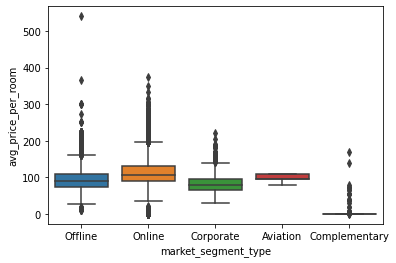

In [ ]:
sns.boxplot(data=df_hotels, y='avg_price_per_room' , x='market_segment_type')

**Observations:** The online market segment has the highest average price per room, once we correct for outliers the data will be a lot cleaner.

**Q4: What percentage of bookings are canceled?**

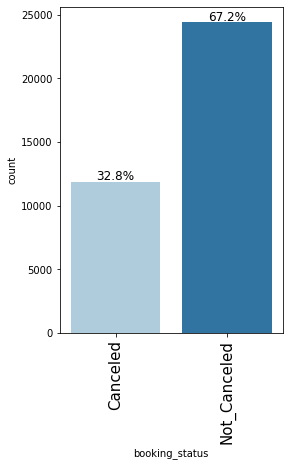

In [ ]:
labeled_barplot(df_hotels, 'booking_status', perc=True, n=None)

**Observations:** 32.8% of bookings are canceled

**Q5: Repeating guests are the guests who stay in the hotel often and are important to brand equity. What percentage of repeating guests cancel?**

booking_status  Canceled  Not_Canceled    All
repeated_guest                               
All                11885         24390  36275
0                  11869         23476  35345
1                     16           914    930
------------------------------------------------------------------------------------------------------------------------


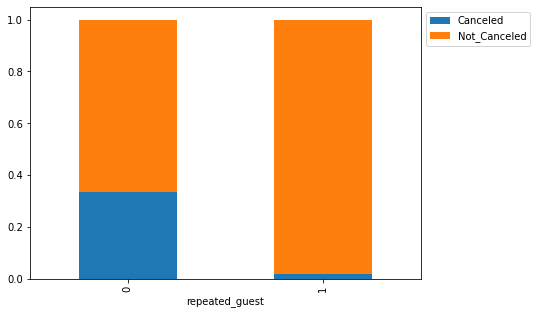

In [ ]:
stacked_barplot(df_hotels,'repeated_guest','booking_status')

**Observations:** Repeated guests has a cancel rate about ~2%.

**Q6: Many guests have special requirements when booking a hotel room. Do these requirements affect booking cancellation?**

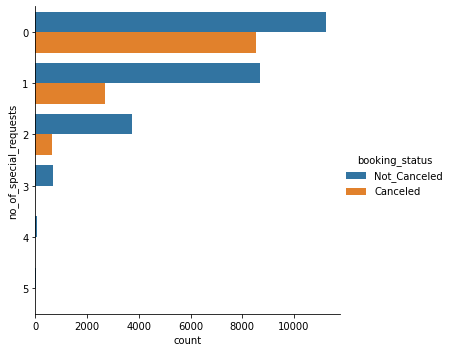

In [ ]:
sns.catplot(data=df_hotels,
            y='no_of_special_requests',
            hue='booking_status',
            kind='count' )

**Observations:** The addition of special requests is correlated with a decrease in the cancellation rate. We cannot be certain that these variables are linked without additional analysis.

## **Bivariate Analysis**

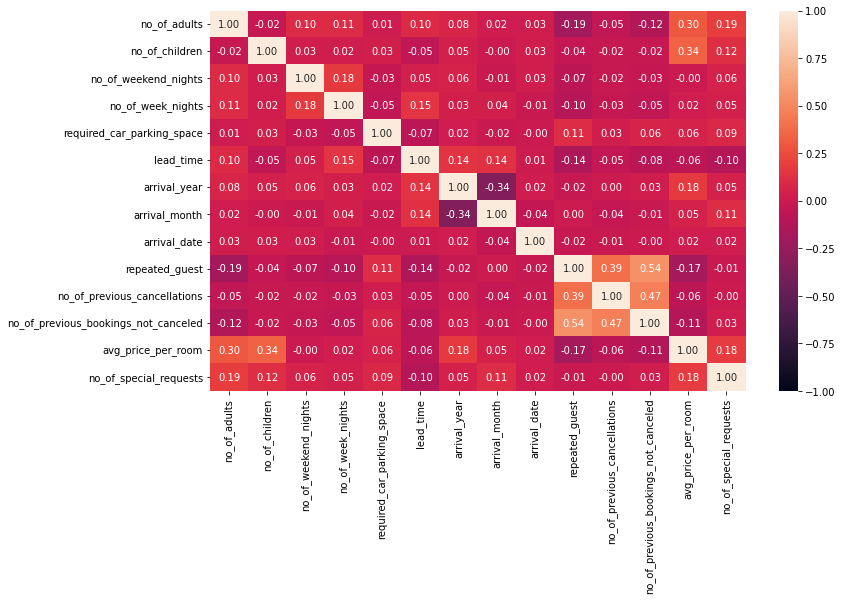

In [ ]:
cols_list = df_hotels.select_dtypes(include=np.number).columns.tolist()
plt.figure(figsize=(12, 7))
sns.heatmap(df_hotels[cols_list].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f")
plt.show()

**Observations:** The highest correlation seems to be between no_of_previous_bookings_not_canceled and repeated_guests. Other than this correlation there does not seem to be high correlatio between any other variables

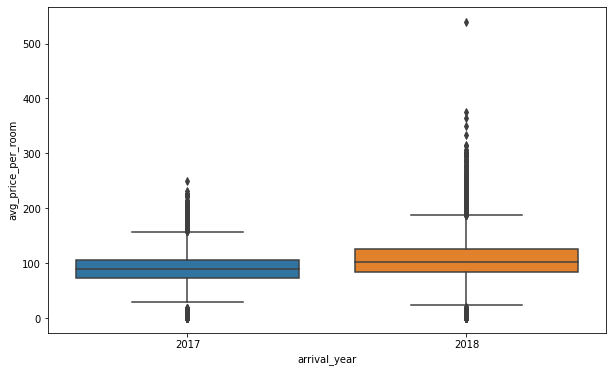

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_hotels, x="arrival_year", y="avg_price_per_room")
plt.show()

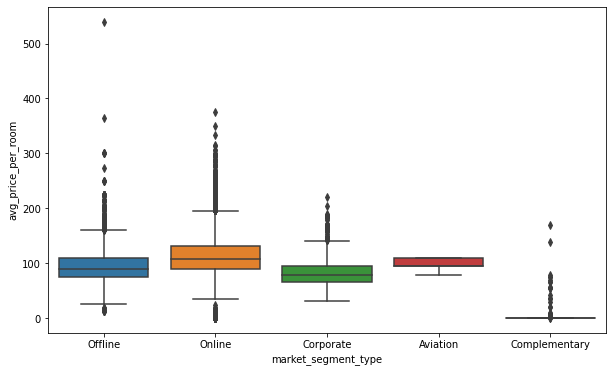

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_hotels, x="market_segment_type", y="avg_price_per_room")
plt.show()

**Observations:** Online prices seem to be higher than other channels

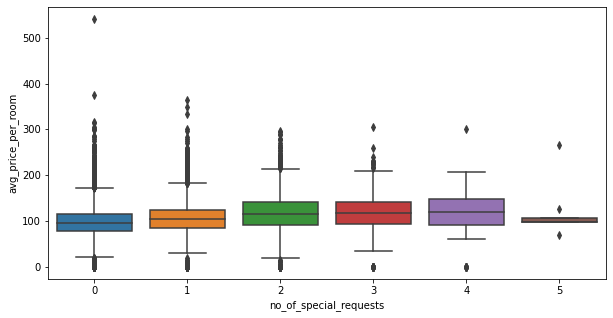

In [ ]:
plt.figure(figsize=(10, 5))
sns.boxplot(data=df_hotels, x="no_of_special_requests", y="avg_price_per_room")
plt.show()

**Observations:** It seems like the price increases after 2-4 number of special requests

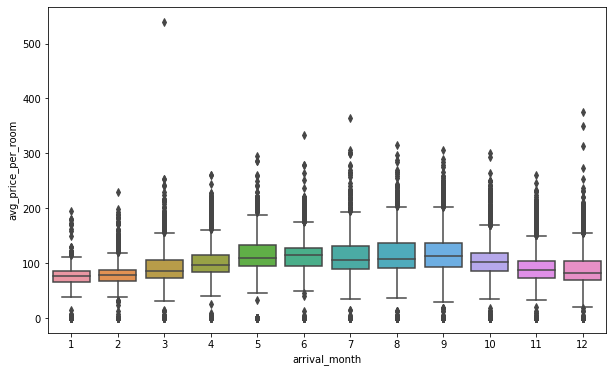

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_hotels, x="arrival_month", y="avg_price_per_room")
plt.show()

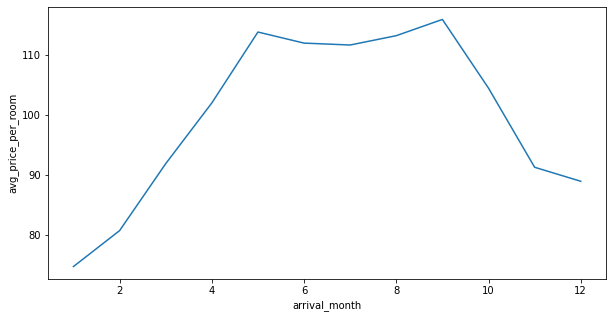

In [ ]:
plt.figure(figsize=(10, 5))
sns.lineplot(y=df_hotels["avg_price_per_room"], x=df_hotels["arrival_month"], ci=None)
plt.show()

**Observations:** Prices are higher in the Summer and Fall months

booking_status  Canceled  Not_Canceled    All
arrival_month                                
All                11885         24390  36275
10                  1880          3437   5317
9                   1538          3073   4611
8                   1488          2325   3813
7                   1314          1606   2920
6                   1291          1912   3203
4                    995          1741   2736
5                    948          1650   2598
11                   875          2105   2980
3                    700          1658   2358
2                    430          1274   1704
12                   402          2619   3021
1                     24           990   1014
------------------------------------------------------------------------------------------------------------------------


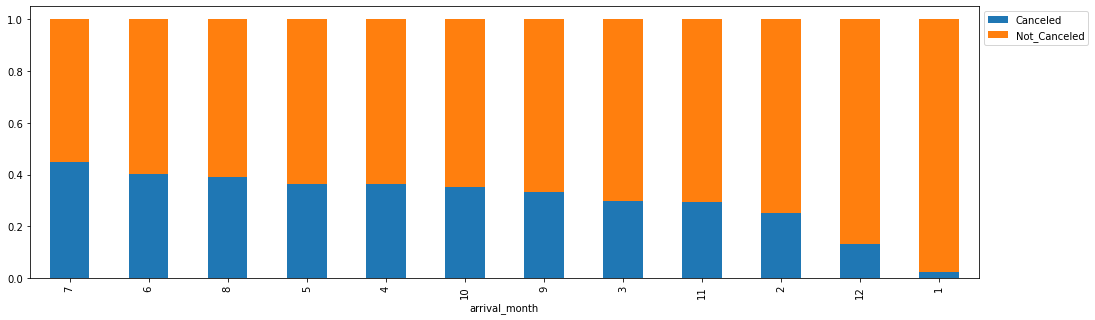

In [ ]:
stacked_barplot(df_hotels, "arrival_month", "booking_status")

**Observations:** It seems that the summer months have more cancelations

In [ ]:
df_hotels["total_days"] = (df_hotels["no_of_week_nights"] + df_hotels["no_of_weekend_nights"])

booking_status  Canceled  Not_Canceled    All
total_days                                   
All                11885         24390  36275
3                   3586          6466  10052
2                   2899          5573   8472
4                   1941          3952   5893
1                   1466          5138   6604
5                    823          1766   2589
6                    465           566   1031
7                    383           590    973
8                     79           100    179
10                    58            51    109
9                     53            58    111
14                    27             5     32
15                    26             5     31
13                    15             3     18
12                    15             9     24
11                    15            24     39
20                     8             3     11
16                     5             1      6
19                     5             1      6
17                     4          

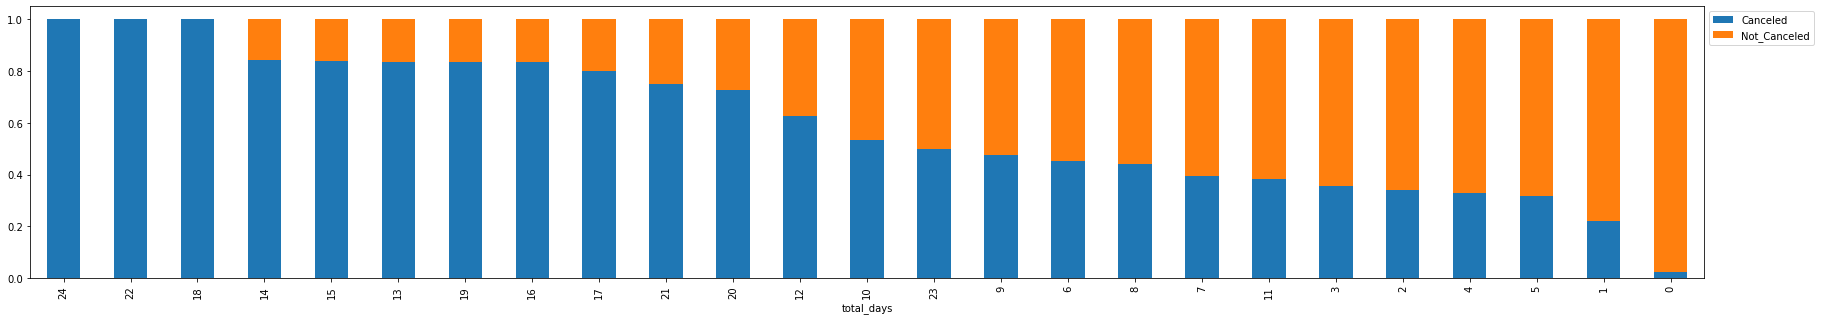

In [ ]:
stacked_barplot(df_hotels, "total_days", "booking_status")

## **Univariate Analysis**

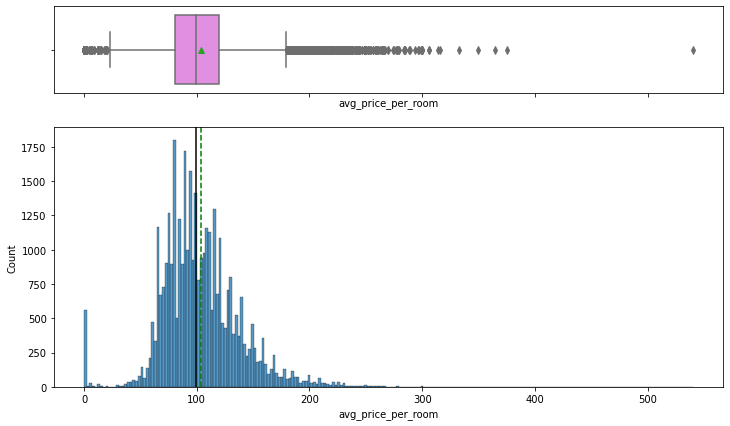

In [ ]:
histogram_boxplot(df_hotels, "avg_price_per_room")

**Observations:** The distribution of average price per room is right skewed. We do have rooms equal to zero which might mean we have a promotion or complementary room programs. I think we can investigate this further.

In [ ]:
df_hotels.loc[df_hotels["avg_price_per_room"] == 0, "arrival_month"].value_counts()

12    90
10    84
9     75
8     59
11    50
1     31
6     30
5     30
7     26
2     25
4     24
3     21
Name: arrival_month, dtype: int64

**Observations:** There are 545 instances of free rooms, they seem to more common in fall and winter months.

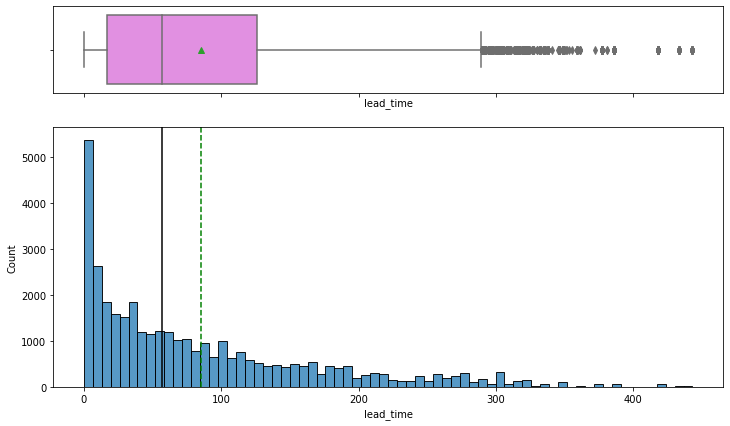

In [ ]:
histogram_boxplot(df_hotels, "lead_time")

**Observations**:The distribution is right skewed. There are outliers above the upper whisker. We also see a lot of customers have no lead time which means that there are customers using same day booking.

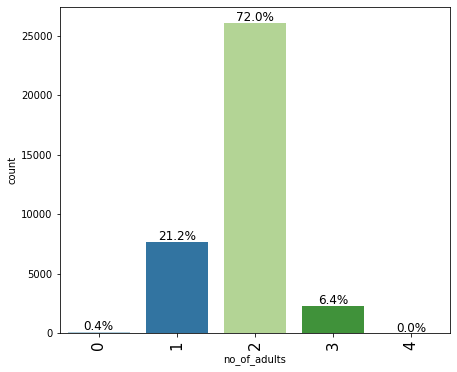

In [ ]:
labeled_barplot(df_hotels, "no_of_adults", perc=True)

**Observations:** 72% of the bookings were made for 2 adults

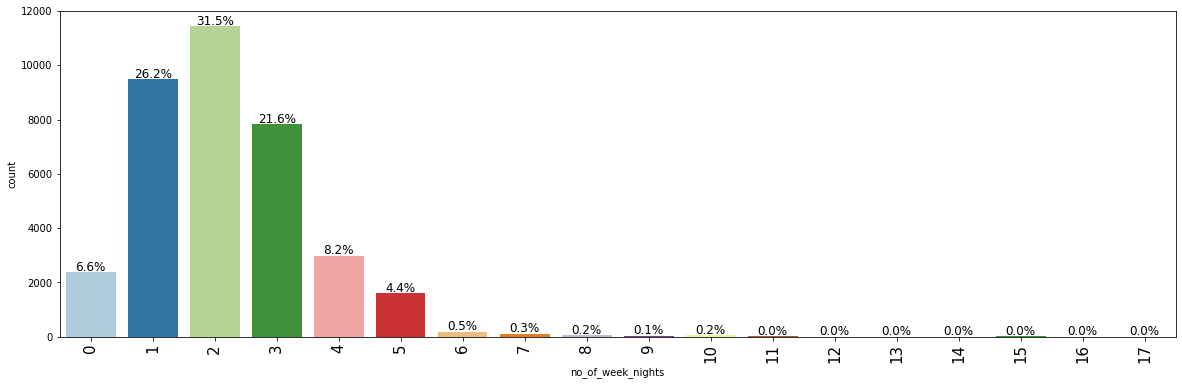

In [ ]:
labeled_barplot(df_hotels, "no_of_week_nights", perc=True)

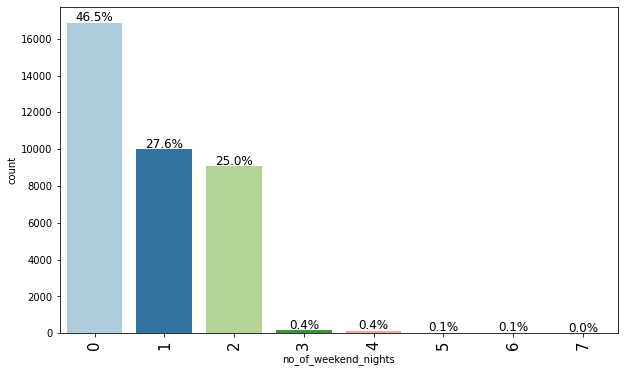

In [ ]:
labeled_barplot(df_hotels, "no_of_weekend_nights", perc=True)

**Observations:** Most of the hotel guests are not staying the weekend. I would hypothesize they get a lot of B2B guests

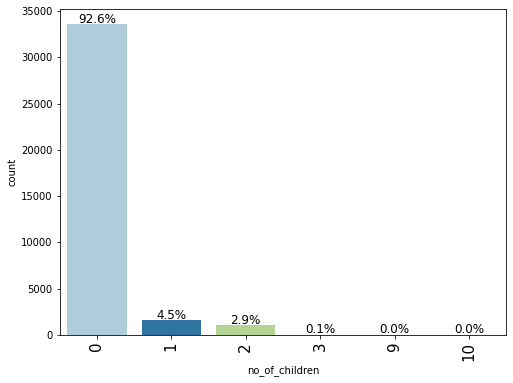

In [ ]:
labeled_barplot(df_hotels, "no_of_children", perc=True)

**Observations:** 93% of customers are not visiting with kids.

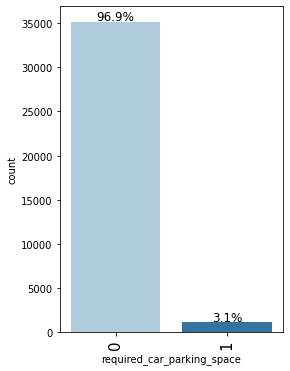

In [ ]:
labeled_barplot(df_hotels, "required_car_parking_space", perc=True)

**Observations:** 97% of hotel guests require a parking space  

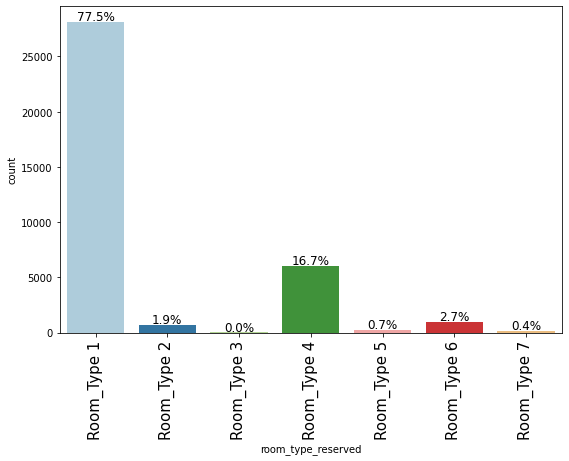

In [ ]:
labeled_barplot(df_hotels, "room_type_reserved", perc=True)

Observations: Room Type 1 is the most popular room type

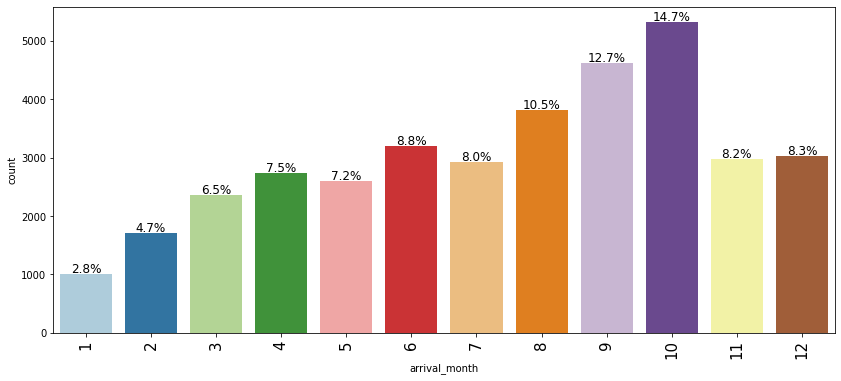

In [ ]:
labeled_barplot(df_hotels, "arrival_month", perc=True)

Observations: Month 10 (October) is the busiest month for the hotel group at 14.7%

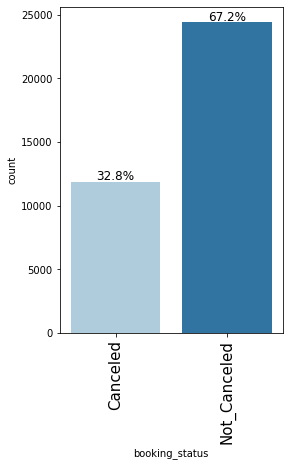

In [ ]:
labeled_barplot(df_hotels, "booking_status", perc=True)

Observations: About 33% of bookings are canceled.

In [ ]:
# I believe that we should encode the canceled bookings to a binary
df_hotels["booking_status"] = df_hotels["booking_status"].apply(lambda x: 1 if x == "Canceled" else 0)

In [ ]:
df_hotels.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status,total_days
0,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,0,3
1,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,0,5
2,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,1,3
3,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,1,2
4,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,1,2


## Data Preprocessing

- Missing value treatment (if needed)
- Feature engineering (if needed)
- Outlier detection and treatment (if needed)
- Preparing data for modeling
- Any other preprocessing steps (if needed)

Observation: No missing values see data overview section

<Figure size 1440x2160 with 0 Axes>

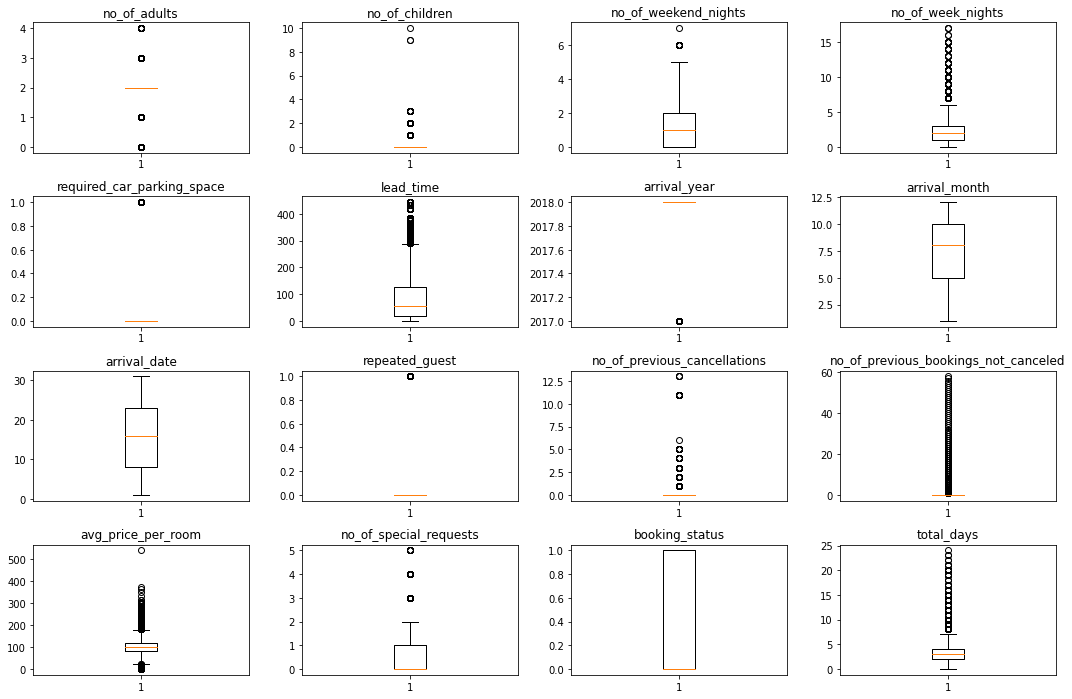

In [ ]:
# Run the outlier check on
numeric_columns = df_hotels.select_dtypes(include=np.number).columns.tolist()
# let's plot the boxplots of all columns to check for outliers
plt.figure(figsize=(20, 30))

plt.figure(figsize=(15, 12))
for i, variable in enumerate(numeric_columns):
    plt.subplot(5, 4, i + 1)
    plt.boxplot(df_hotels[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)

plt.show()

Observations: I am going to determine that these outliers are fine to keep for the analysis. They seem to be valid data points.

In [ ]:
df_hotels_1 = df_hotels.drop(["total_days"], axis=1)

In [ ]:
X = df_hotels_1.drop(["booking_status"], axis=1)
Y = df_hotels_1["booking_status"]

# adding constant
X = sm.add_constant(X)

#making sure that we get dummy variables into
X = pd.get_dummies(X, drop_first=True)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [ ]:
# Splitting data into train and test sets with a 70/30 split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.30, random_state=1)

In [ ]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25392 entries, 13662 to 33003
Data columns (total 28 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   const                                 25392 non-null  float64
 1   no_of_adults                          25392 non-null  int64  
 2   no_of_children                        25392 non-null  int64  
 3   no_of_weekend_nights                  25392 non-null  int64  
 4   no_of_week_nights                     25392 non-null  int64  
 5   required_car_parking_space            25392 non-null  int64  
 6   lead_time                             25392 non-null  int64  
 7   arrival_year                          25392 non-null  int64  
 8   arrival_month                         25392 non-null  int64  
 9   arrival_date                          25392 non-null  int64  
 10  repeated_guest                        25392 non-null  int64  
 11  no_of_previ

In [ ]:
print("Shape of Training set : ", X_train.shape)
print("Shape of test set : ", X_test.shape)

Shape of Training set :  (25392, 28)
Shape of test set :  (10883, 28)


In [ ]:
print("Percentage of classes in training set:")
print(y_train.value_counts(normalize=True))
print("Percentage of classes in test set:")
print(y_test.value_counts(normalize=True))

Percentage of classes in training set:
0    0.670644
1    0.329356
Name: booking_status, dtype: float64
Percentage of classes in test set:
0    0.676376
1    0.323624
Name: booking_status, dtype: float64


## EDA

- It is a good idea to explore the data once again after manipulating it.

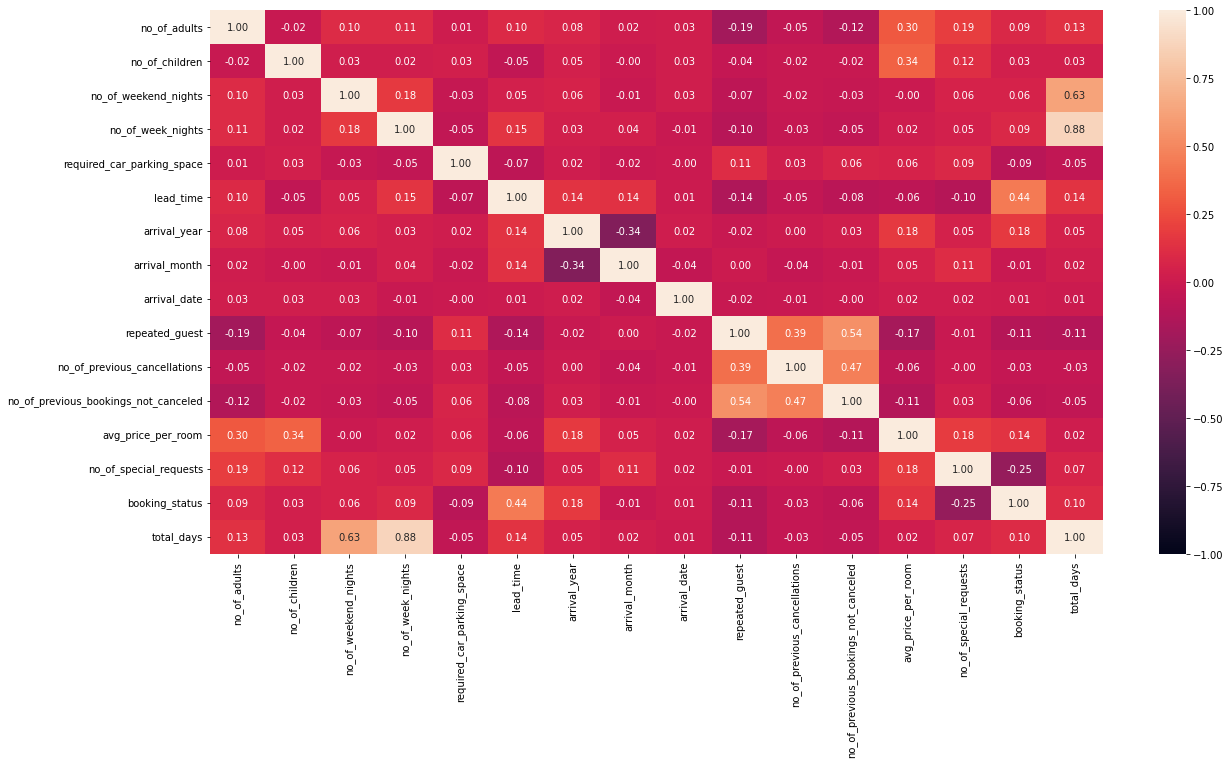

In [ ]:
plt.figure(figsize=(20,10))
sns.heatmap(
df_hotels.corr(), annot=True, vmin=-1, vmax=1, fmt='.2f')

## Checking Multicollinearity

- In order to make statistical inferences from a logistic regression model, it is important to ensure that there is no multicollinearity present in the data.

In [ ]:
# VIF Check
vif_series = pd.Series([variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])],index=X_train.columns,dtype=float,)
print(vif_series)

const                                   3.946816e+07
no_of_adults                            1.348154e+00
no_of_children                          1.978229e+00
no_of_weekend_nights                    1.069475e+00
no_of_week_nights                       1.095667e+00
required_car_parking_space              1.039928e+00
lead_time                               1.394914e+00
arrival_year                            1.430830e+00
arrival_month                           1.275673e+00
arrival_date                            1.006738e+00
repeated_guest                          1.783516e+00
no_of_previous_cancellations            1.395689e+00
no_of_previous_bookings_not_canceled    1.651986e+00
avg_price_per_room                      2.050421e+00
no_of_special_requests                  1.247278e+00
type_of_meal_plan_Meal Plan 2           1.271851e+00
type_of_meal_plan_Meal Plan 3           1.025216e+00
type_of_meal_plan_Not Selected          1.272183e+00
room_type_reserved_Room_Type 2          1.1014

**Observations:** I beleive that we can ignore the VIF for the catergorical variables. Other than that, I believe we are good on the VIF front


## Building a Logistic Regression model

In [ ]:
# fitting logistic regression model
logit = sm.Logit(y_train, X_train.astype(float))
lg = logit.fit()


         Current function value: 0.425036
         Iterations: 35


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


In [ ]:
# print the logistic regression summary
print(lg.summary())

                           Logit Regression Results                           
Dep. Variable:         booking_status   No. Observations:                25392
Model:                          Logit   Df Residuals:                    25364
Method:                           MLE   Df Model:                           27
Date:                Fri, 25 Nov 2022   Pseudo R-squ.:                  0.3293
Time:                        05:12:22   Log-Likelihood:                -10793.
converged:                      False   LL-Null:                       -16091.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                           coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------
const                                 -924.5923    120.817     -7.653      0.000   -1161.390    -687.795
no_of_adults                             0.1135      

We need to drop the high p-value variables.

In [ ]:
# initial list of columns
list_columns = X_train.columns.tolist()

# setting an initial max p-value
max_p_value = 1

# Running a loop to drop dummies with high p-value
while len(list_columns) > 0:
    X_train_L = X_train[list_columns]
    model = sm.Logit(y_train, X_train_L).fit(disp=False)
    p_values = model.pvalues
    max_p_value = max(p_values)
    feature_with_p_max = p_values.idxmax()
    if max_p_value > 0.05:
        list_columns.remove(feature_with_p_max)
    else:
        break

select_features = list_columns
print(select_features)

/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


['const', 'no_of_adults', 'no_of_children', 'no_of_weekend_nights', 'no_of_week_nights', 'required_car_parking_space', 'lead_time', 'arrival_year', 'arrival_month', 'repeated_guest', 'no_of_previous_cancellations', 'avg_price_per_room', 'no_of_special_requests', 'type_of_meal_plan_Meal Plan 2', 'type_of_meal_plan_Not Selected', 'room_type_reserved_Room_Type 2', 'room_type_reserved_Room_Type 4', 'room_type_reserved_Room_Type 5', 'room_type_reserved_Room_Type 6', 'room_type_reserved_Room_Type 7', 'market_segment_type_Corporate', 'market_segment_type_Offline']


**Observations:** The idea behind the loop is that instead of figuring out each variable that has a higher pvalue than 0.05, we can automate and iterate that process using the loop.

In [ ]:
X_train_N = X_train[select_features]
X_test_N = X_test[select_features]

In [ ]:
logit1 = sm.Logit(y_train, X_train_N.astype(float))
lg_N = logit1.fit(disp=False)
print(lg_N.summary())

                           Logit Regression Results                           
Dep. Variable:         booking_status   No. Observations:                25392
Model:                          Logit   Df Residuals:                    25370
Method:                           MLE   Df Model:                           21
Date:                Fri, 25 Nov 2022   Pseudo R-squ.:                  0.3283
Time:                        05:30:41   Log-Likelihood:                -10809.
converged:                       True   LL-Null:                       -16091.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                     coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                           -917.2860    120.456     -7.615      0.000   -1153.376    -681.196
no_of_adults                       0.1086      0.037      2.914      0.

All our P values are less than 0.05 and we can now say that lg_N is our best model  to proceed with. We will now evaluate the model in the next section.

## Model performance evaluation

In [ ]:
 #defining a function to compute different metrics to check performance of a classification model built using statsmodels


def model_performance_classification_statsmodels(
    model, predictors, target, threshold=0.5
):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    threshold: threshold for classifying the observation as class 1
    """

    # checking which probabilities are greater than threshold
    pred_temp = model.predict(predictors) > threshold
    # rounding off the above values to get classes
    pred = np.round(pred_temp)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1,},
        index=[0],
    )

    return df_perf
# defining a function to plot the confusion_ma

In [ ]:
def confusion_matrix_statsmodels(model, predictors, target, threshold=0.5):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    threshold: threshold for classifying the observation as class 1
    """
    y_pred = model.predict(predictors) > threshold
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

In [ ]:
print("Training performance:")
model_performance_classification_statsmodels(lg_N, X_train_N, y_train)

Training performance:


,Accuracy,Recall,Precision,F1
0,0.80541,0.63255,0.73903,0.68166


Training Set Performance


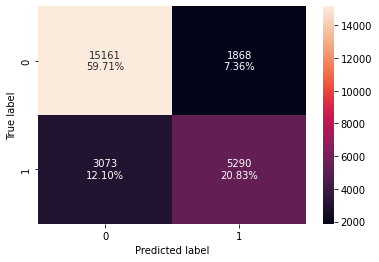

In [ ]:
confusion_matrix_statsmodels(lg_N, X_train_N, y_train)

Observations: Checking the performance on the train set.

In [ ]:
log_reg_model_train_perf = model_performance_classification_statsmodels(
    lg_N, X_train_N, y_train
)

print("Training performance:")
log_reg_model_train_perf

Training performance:


,Accuracy,Recall,Precision,F1
0,0.80541,0.63255,0.73903,0.68166


In [ ]:
X_test1 = X_test_N[list(X_train_N.columns)]

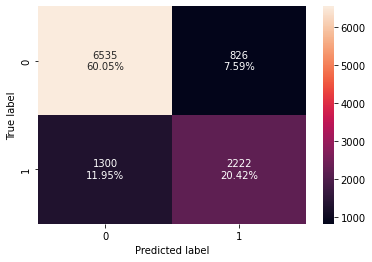

In [ ]:
# creating confusion matrix
confusion_matrix_statsmodels(lg_N, X_test1, y_test)

In [ ]:
log_reg_model_test_perf = model_performance_classification_statsmodels(
    lg_N, X_test1, y_test
)

print("Test performance:")
log_reg_model_test_perf

Test performance:


,Accuracy,Recall,Precision,F1
0,0.80465,0.63089,0.72900,0.67641


Converting coefficients to odds

The coefficients ( β s) of the logistic regression model are in terms of  log(odds)  and to find the odds, we have to take the exponential of the coefficients
Therefore,  odds=exp(β)
The percentage change in odds is given as  (exp(β)−1)∗100

In [ ]:
# converting coefficients to odds
odds = np.exp(lg_N.params)

# finding the percentage change
perc_change_odds = (np.exp(lg_N.params) - 1) * 100

# removing limit from number of columns to display
pd.set_option("display.max_columns", None)

# adding the odds to a dataframe
pd.DataFrame({"Odds": odds, "Change_odd%": perc_change_odds}, index=X_train_N.columns).T

,const,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,required_car_parking_space,lead_time,arrival_year,arrival_month,repeated_guest,no_of_previous_cancellations,avg_price_per_room,no_of_special_requests,type_of_meal_plan_Meal Plan 2,type_of_meal_plan_Not Selected,room_type_reserved_Room_Type 2,room_type_reserved_Room_Type 4,room_type_reserved_Room_Type 5,room_type_reserved_Room_Type 6,room_type_reserved_Room_Type 7,market_segment_type_Corporate,market_segment_type_Offline
Odds,0.00000,1.11475,1.16436,1.11475,1.04264,0.20305,1.01584,1.57324,0.95853,0.06480,1.25716,1.01935,0.22994,1.17992,1.33089,0.70046,0.75383,0.47940,0.38099,0.23903,0.45258,0.16750
Change_odd%,-100.00000,11.47536,16.43601,11.47526,4.26363,-79.69523,1.58352,57.32351,-4.14725,-93.52026,25.71567,1.93479,-77.00595,17.99156,33.08924,-29.95389,-24.61701,-52.05967,-61.90093,-76.09669,-54.74162,-83.24963


ROC Curve and ROC_AUC

ROC-AUC on Training Set

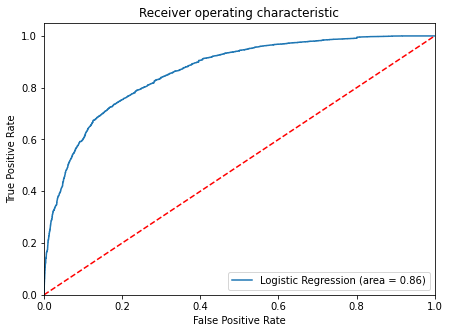

In [ ]:
logit_roc_auc_train = roc_auc_score(y_train, lg_N.predict(X_train_N))
fpr, tpr, thresholds = roc_curve(y_train, lg_N.predict(X_train_N))
plt.figure(figsize=(7, 5))
plt.plot(fpr, tpr, label="Logistic Regression (area = %0.2f)" % logit_roc_auc_train)
plt.plot([0, 1], [0, 1], "r--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic")
plt.legend(loc="lower right")
plt.show()

In [ ]:
# Optimal threshold as per AUC-ROC curve
# The optimal cut off would be where tpr is high and fpr is low
fpr, tpr, thresholds = roc_curve(y_train, lg_N.predict(X_train_N))

optimal_idx = np.argmax(tpr - fpr)
optimal_threshold_auc_roc = thresholds[optimal_idx]
print(optimal_threshold_auc_roc)

0.37104666234889655


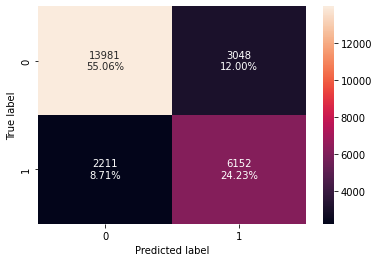

In [ ]:
# creating confusion matrix
confusion_matrix_statsmodels(
    lg_N, X_train_N, y_train, threshold=optimal_threshold_auc_roc
)

In [ ]:
# checking model performance for this model
log_reg_model_train_perf_threshold_auc_roc = model_performance_classification_statsmodels(
    lg_N, X_train_N, y_train, threshold=optimal_threshold_auc_roc
)
print("Training performance:")
log_reg_model_train_perf_threshold_auc_roc

Training performance:


,Accuracy,Recall,Precision,F1
0,0.79289,0.73562,0.66870,0.70056


Observations: The F1 has increased relative to the train set performance.

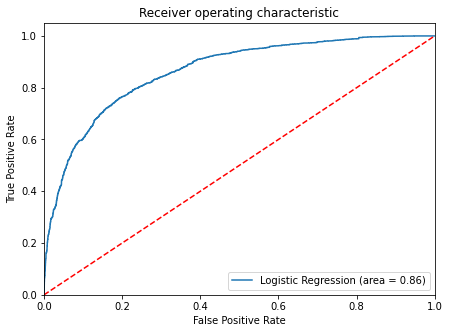

In [ ]:
logit_roc_auc_train = roc_auc_score(y_test, lg_N.predict(X_test1))
fpr, tpr, thresholds = roc_curve(y_test, lg_N.predict(X_test1))
plt.figure(figsize=(7, 5))
plt.plot(fpr, tpr, label="Logistic Regression (area = %0.2f)" % logit_roc_auc_train)
plt.plot([0, 1], [0, 1], "r--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic")
plt.legend(loc="lower right")
plt.show()

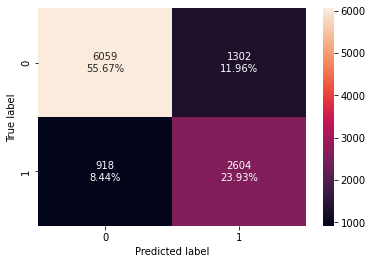

In [ ]:
# creating confusion matrix
confusion_matrix_statsmodels(lg_N, X_test1, y_test, threshold=optimal_threshold_auc_roc)

In [ ]:
# checking model performance for this model
log_reg_model_test_perf_threshold_auc_roc = model_performance_classification_statsmodels(
    lg_N, X_test1, y_test, threshold=optimal_threshold_auc_roc
)
print("Test performance:")
log_reg_model_test_perf_threshold_auc_roc

Test performance:


,Accuracy,Recall,Precision,F1
0,0.79601,0.73935,0.66667,0.70113


Observations: The F1 has increased relative to the train set performance.

Precision-Recall Curve

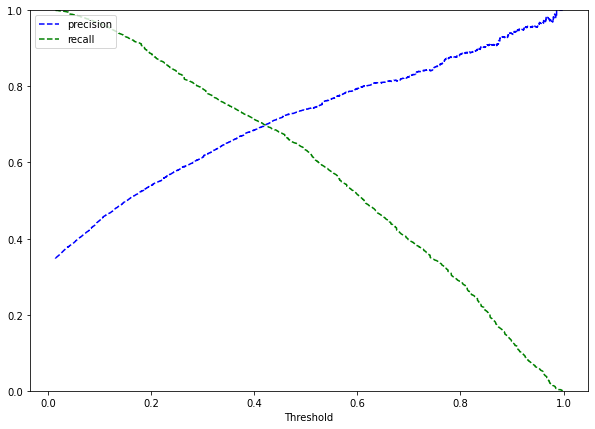

In [ ]:
y_scores = lg_N.predict(X_train_N)
prec, rec, tre = precision_recall_curve(y_train, y_scores,)


def plot_prec_recall_vs_tresh(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="precision")
    plt.plot(thresholds, recalls[:-1], "g--", label="recall")
    plt.xlabel("Threshold")
    plt.legend(loc="upper left")
    plt.ylim([0, 1])


plt.figure(figsize=(10, 7))
plot_prec_recall_vs_tresh(prec, rec, tre)
plt.show()

Observations: We get another threshold at 0.43

In [ ]:
# setting the threshold
optimal_threshold__Precision_curve = 0.43

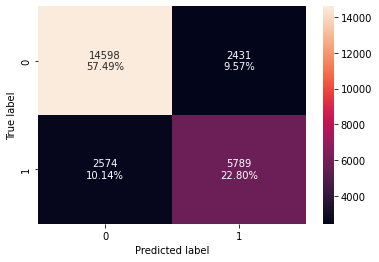

In [ ]:
# creating confusion matrix
confusion_matrix_statsmodels(lg_N, X_train_N, y_train, threshold=optimal_threshold__Precision_curve)

In [ ]:
log_reg_model_train_perf_threshold_curve = model_performance_classification_statsmodels(
    lg_N, X_train_N, y_train, threshold=optimal_threshold__Precision_curve
)
print("Training performance:")
log_reg_model_train_perf_threshold_curve

Training performance:


,Accuracy,Recall,Precision,F1
0,0.80289,0.69222,0.70426,0.69818


Observations: F-Score stayed relatively the same, but the model has improved slightly

 Performance on the test set

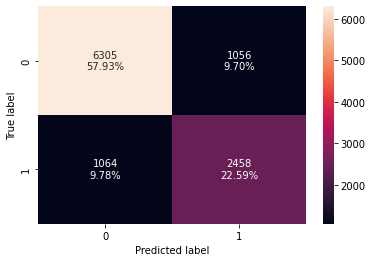

In [ ]:
# creating confusion matrix
confusion_matrix_statsmodels(lg_N, X_test1, y_test, threshold=optimal_threshold__Precision_curve)

In [ ]:
log_reg_model_test_perf_threshold_curve = model_performance_classification_statsmodels(
    lg_N, X_test1, y_test, threshold=optimal_threshold__Precision_curve
)
print("Test performance:")
log_reg_model_test_perf_threshold_curve

Test performance:


,Accuracy,Recall,Precision,F1
0,0.80520,0.69790,0.69949,0.69869


## Final Model Summary

In [ ]:
# test performance comparison

models_test_comp_df = pd.concat(
    [
        log_reg_model_test_perf.T,
        log_reg_model_test_perf_threshold_auc_roc.T,
        log_reg_model_test_perf_threshold_curve.T,
    ],
    axis=1,
)
models_test_comp_df.columns = [
    "Logistic Regression-default Threshold",
    "Logistic Regression-0.37 Threshold",
    "Logistic Regression-0.43 Threshold",
]

print("Test performance comparison:")
models_test_comp_df

Test performance comparison:


,Logistic Regression-default Threshold,Logistic Regression-0.37 Threshold,Logistic Regression-0.43 Threshold
Accuracy,0.80465,0.79601,0.80520
Recall,0.63089,0.73935,0.69790
Precision,0.72900,0.66667,0.69949
F1,0.67641,0.70113,0.69869


In [ ]:
# training performance comparison

models_train_comp_df = pd.concat(
    [
        log_reg_model_train_perf.T,
        log_reg_model_train_perf_threshold_auc_roc.T,
        log_reg_model_train_perf_threshold_curve.T,
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "Logistic Regression-default Threshold (0.5)",
    "Logistic Regression-0.37 Threshold",
    "Logistic Regression-0.43 Threshold",
]

print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


,Logistic Regression-default Threshold (0.5),Logistic Regression-0.37 Threshold,Logistic Regression-0.43 Threshold
Accuracy,0.80541,0.79289,0.80289
Recall,0.63255,0.73562,0.69222
Precision,0.73903,0.66870,0.70426
F1,0.68166,0.70056,0.69818


Observations:
*   Our predictive model can be used by INN to predict whether bookings are going to be cancelled. If you are able to provide predicitive value on customers canceling, it could serve the marketing team on providing targeted strategies to reduce booking cancellations.
*   We achieved an F1 score of ~0.69 on the training set and test set.
*   Default Threshold: The model had low recall but the highest accuracy of all the models.
*   Logistic Regression (ROC-AUC): This model had a low precision score balanced out with a high recall.
*   Logistic Regression (Precision Recall): This model had a balanced precision and recall.


## Building a Decision Tree model

In [ ]:
model = DecisionTreeClassifier(criterion="gini", random_state=1)
model.fit(X_train_N, y_train)

DecisionTreeClassifier(random_state=1)

First, let's create functions to calculate different metrics and confusion matrix so that we don't have to use the same code repeatedly for each model.
The model_performance_classification_sklearn function will be used to check the model performance of models.
The make_confusion_matrix function will be used to plot confusion matrix.

In [ ]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn
def model_performance_classification_sklearn(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1,},
        index=[0],
    )

    return df_perf

In [ ]:
def confusion_matrix_sklearn(model, predictors, target):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

## Do we need to prune the tree?

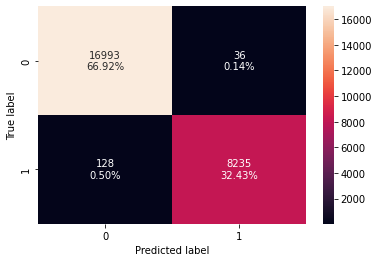

In [ ]:
confusion_matrix_sklearn(model, X_train_N, y_train)

In [ ]:
decision_tree_perf_train = model_performance_classification_sklearn(
    model, X_train_N, y_train
)
decision_tree_perf_train

,Accuracy,Recall,Precision,F1
0,0.99354,0.98469,0.99565,0.99014


Observations: This model has performed very well in the training set. The Accuracy, recall, precision and F1 are all very strong. I suspect we will need to check on overfitting.

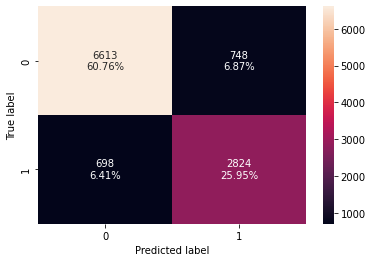

In [ ]:
confusion_matrix_sklearn(model, X_test1, y_test)

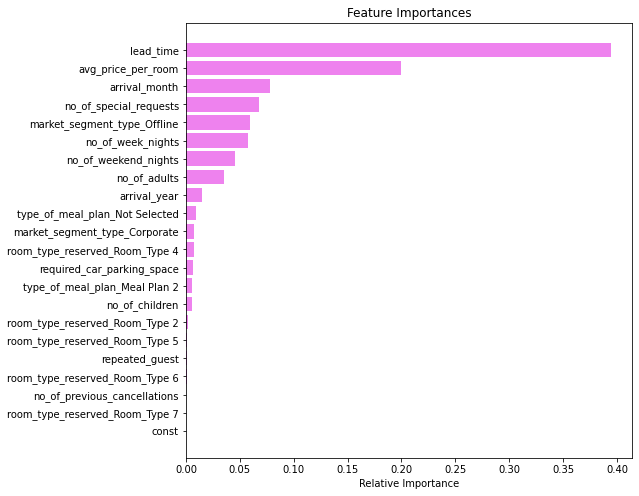

In [ ]:
feature_names = list(X_train_N.columns)
importances = model.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(8, 8))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

The three important features are lead_time, avg_price_per_room and arrival_month.

I believe due to overfitting we see that the test set is not able to be generalized. I believe we will have to prune the decision tree.


### Pruning Tree

Using GridSearch for Hyperparameter tuning of our tree model
Let's see if we can improve our model performance even more.

In [ ]:
# Choose the type of classifier.
estimator = DecisionTreeClassifier(random_state=1, class_weight="balanced")

# Grid of parameters to choose from
parameters = {
    "max_depth": np.arange(2, 7, 2),
    "max_leaf_nodes": [50, 75, 150, 250],
    "min_samples_split": [10, 30, 50, 70],
}

# Type of scoring used to compare parameter combinations
acc_scorer = make_scorer(f1_score)

# Run the grid search
grid_obj = GridSearchCV(estimator, parameters, scoring=acc_scorer, cv=5)
grid_obj = grid_obj.fit(X_train_N, y_train)

# Set the clf to the best combination of parameters
estimator = grid_obj.best_estimator_

# Fit the best algorithm to the data.
estimator.fit(X_train_N, y_train)

DecisionTreeClassifier(class_weight='balanced', max_depth=6, max_leaf_nodes=50,
                       min_samples_split=30, random_state=1)

Checking performance on training set/test set

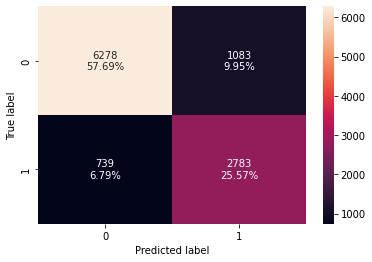

In [ ]:
confusion_matrix_sklearn(estimator, X_test1, y_test)

In [ ]:
decision_tree_tune_perf_test = model_performance_classification_sklearn(
    estimator, X_test1, y_test
)
decision_tree_tune_perf_test

,Accuracy,Recall,Precision,F1
0,0.83258,0.79018,0.71987,0.75338


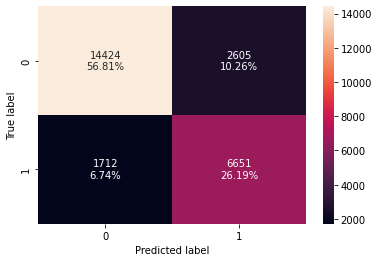

In [ ]:
confusion_matrix_sklearn(estimator, X_train_N, y_train)

In [ ]:
decision_tree_tune_perf_train = model_performance_classification_sklearn(
    estimator, X_train_N, y_train
)
decision_tree_tune_perf_train

,Accuracy,Recall,Precision,F1
0,0.82999,0.79529,0.71856,0.75498


Viz for the Decision Tree

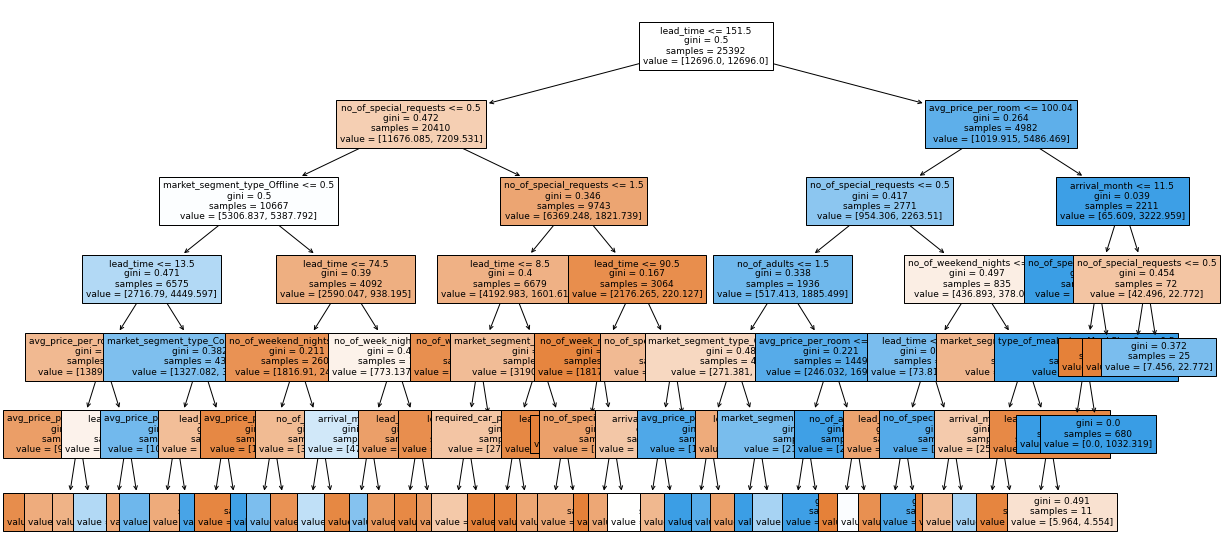

In [ ]:
plt.figure(figsize=(20, 10))
out = tree.plot_tree(estimator,feature_names=feature_names,filled=True,fontsize=9,node_ids=False,class_names=None,
)

In [ ]:
# Text report showing the rules of a decision tree -
print(tree.export_text(estimator, feature_names=feature_names, show_weights=True))

|--- lead_time <= 151.50
|   |--- no_of_special_requests <= 0.50
|   |   |--- market_segment_type_Offline <= 0.50
|   |   |   |--- lead_time <= 13.50
|   |   |   |   |--- avg_price_per_room <= 100.87
|   |   |   |   |   |--- avg_price_per_room <= 74.97
|   |   |   |   |   |   |--- weights: [427.95, 40.99] class: 0
|   |   |   |   |   |--- avg_price_per_room >  74.97
|   |   |   |   |   |   |--- weights: [515.18, 176.10] class: 0
|   |   |   |   |--- avg_price_per_room >  100.87
|   |   |   |   |   |--- lead_time <= 3.50
|   |   |   |   |   |   |--- weights: [266.16, 104.75] class: 0
|   |   |   |   |   |--- lead_time >  3.50
|   |   |   |   |   |   |--- weights: [180.42, 296.03] class: 1
|   |   |   |--- lead_time >  13.50
|   |   |   |   |--- market_segment_type_Corporate <= 0.50
|   |   |   |   |   |--- avg_price_per_room <= 60.07
|   |   |   |   |   |   |--- weights: [79.77, 24.29] class: 0
|   |   |   |   |   |--- avg_price_per_room >  60.07
|   |   |   |   |   |   |--- weights: [9

I would like to see what happened to the relative importance of variables

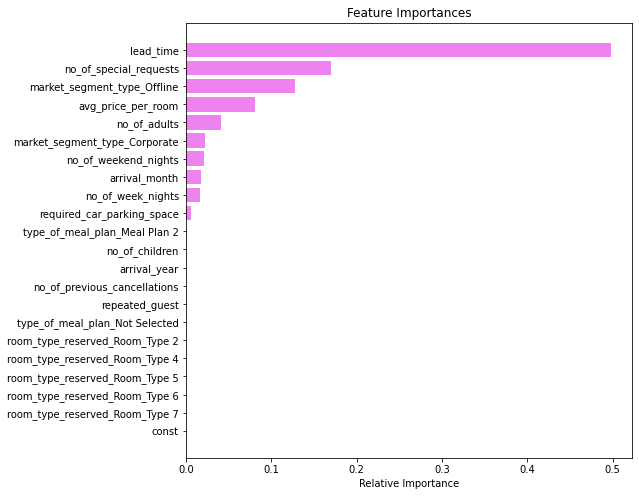

In [ ]:
importances = estimator.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(8, 8))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

Cost Complexity Pruning

In [ ]:
clf = DecisionTreeClassifier(random_state=1)
path = clf.cost_complexity_pruning_path(X_train_N, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

In [ ]:
pd.DataFrame(path)

,ccp_alphas,impurities
0,0.00000,0.00831
1,0.00000,0.00831
2,0.00000,0.00831
3,0.00000,0.00831
4,0.00000,0.00831
...,...,...
1434,0.00454,0.28027
1435,0.00659,0.29344
1436,0.01726,0.31070
1437,0.01816,0.36518


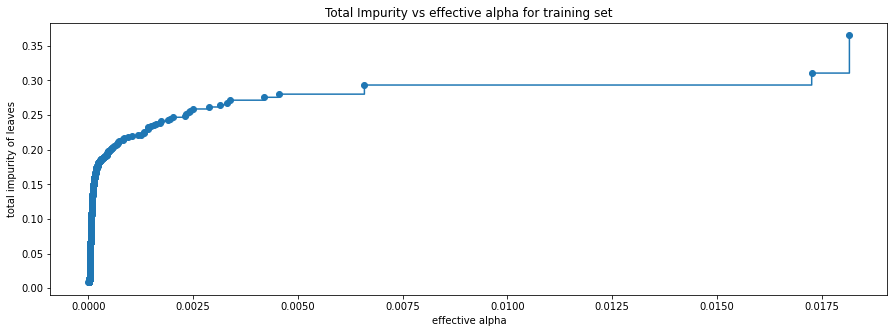

In [ ]:
fig, ax = plt.subplots(figsize=(15, 5))
ax.plot(ccp_alphas[:-1], impurities[:-1], marker="o", drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set")
plt.show()

Next, we train a decision tree using the effective alphas. The last value in ccp_alphas is the alpha value that prunes the whole tree, leaving the tree, clfs[-1], with one node.

In [ ]:
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(
        random_state=1, ccp_alpha=ccp_alpha, class_weight="balanced"
    )
    clf.fit(X_train_N, y_train)
    clfs.append(clf)
print(
    "Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
        clfs[-1].tree_.node_count, ccp_alphas[-1]
    )
)

KeyboardInterrupt: ignored

## Model Performance Comparison and Conclusions

## Actionable Insights and Recommendations

- What profitable policies for cancellations and refunds can the hotel adopt?
- What other recommedations would you suggest to the hotel?

Actionable Insights: The three most important variables when considering cancellations were lead time,special requests and price. Rooms that were booked less than ~150 days were unlikely to cancel. Those booked more than 150 days were likely to cancel. Additionally, consumers are price elastic meaning they seek out low prices, meaning our product is not differentiated.

**Reccomendations:**
*   EDA reveals that you can increase price in Late Summer and Fall to take advantage of seasonal travel.
*   Start having some sort of deposit on rooms in advance of 5 months
*   Cross-sell special requests could increase profits

